In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [7]:
df = pd.read_csv('../data/titanic-master-table.csv')
df.head()

,Unnamed: 0,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,is-Pclass-1,is-Pclass-2,is-Sex-male,is-Embarked-S,is-Embarked-C,family_size
0,0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,1,0,1
1,2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1,0,0
2,3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,1,0,1
3,4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,1,0,0
4,6,7,0,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,1,0,1,1,0,0


In [8]:
len(df)

613

In [9]:
df.describe()

,Unnamed: 0,PassengerId,Survived,Age,SibSp,Parch,Fare,is-Pclass-1,is-Pclass-2,is-Sex-male,is-Embarked-S,is-Embarked-C,family_size
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,447.641109,448.641109,0.353997,28.946574,0.487765,0.401305,18.707565,0.146819,0.274062,0.673736,0.820555,0.137031,0.889070
std,263.229444,263.229444,0.478599,14.368139,0.955854,0.849143,13.767907,0.354214,0.446405,0.469228,0.384038,0.344161,1.513802
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,211.000000,0.000000,20.000000,0.000000,0.000000,7.925000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,447.000000,448.000000,0.000000,28.000000,0.000000,0.000000,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,682.000000,683.000000,1.000000,37.000000,1.000000,0.000000,26.250000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,890.000000,891.000000,1.000000,80.000000,5.000000,6.000000,65.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [10]:
df.isna().sum(axis=0)/len(df)

Unnamed: 0       0.0
PassengerId      0.0
Survived         0.0
Name             0.0
Age              0.0
SibSp            0.0
Parch            0.0
Ticket           0.0
Fare             0.0
is-Pclass-1      0.0
is-Pclass-2      0.0
is-Sex-male      0.0
is-Embarked-S    0.0
is-Embarked-C    0.0
family_size      0.0
dtype: float64

In [11]:
df =df[ df.Age.notna() ]

In [16]:
df.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Name', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'is-Pclass-1', 'is-Pclass-2', 'is-Sex-male',
       'is-Embarked-S', 'is-Embarked-C', 'family_size'],
      dtype='object')

In [20]:
# vars_disc = ['Survived','Pclass','Sex','Age','SibSp', 'Parch', 'Embarked']
# for i in vars_disc:
#     print(df[i].value_counts())

vars_cat = ['Pclass', 'Sex', 'Embarked']
# One hot encoding
def one_hot(df):
    for i in vars_cat:
        categorias = df[i].value_counts().index
        print(categorias)
    
    for k in categorias:
        name = 'is-' + str(i)+'-'+(str(k))
        print(name)
        df[name] = np.where(df[i] == k,1,0)
    
    df = df.drop([i], axis=1)

In [21]:
# Outliers
df.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Name', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'is-Pclass-1', 'is-Pclass-2', 'is-Sex-male',
       'is-Embarked-S', 'is-Embarked-C', 'family_size'],
      dtype='object')

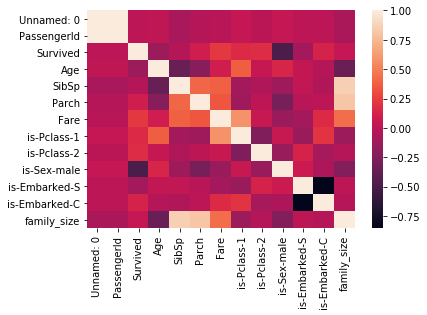

In [24]:
df['family_size'] = df['SibSp'] + df['Parch']
corr = df.corr()
sns.heatmap(corr, yticklabels=corr.columns,xticklabels=corr.columns)

In [51]:
df.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Name', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'is-Pclass-1', 'is-Pclass-2', 'is-Sex-male',
       'is-Embarked-S', 'is-Embarked-C', 'family_size'],
      dtype='object')

In [53]:
# Analisis predictivo
y = df['Survived']
x = df[['Age', 'SibSp', 'Parch', 'Fare', 'is-Pclass-1', 'is-Pclass-2', 'is-Sex-male', 'is-Embarked-S', 'is-Embarked-C', 'family_size']]

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.15, random_state=1)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [66]:
clf = [
    (LogisticRegression(), 'reg-log'),
    (DecisionTreeClassifier(), 'arbol-class')
]
clf

[(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False),
  'reg-log'),
 (DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'),
  'arbol-class')]

In [67]:
import joblib
from sklearn.metrics import accuracy_score
for model, name in clf:
    # Entrenar
    model.fit(X_train, Y_train)
    # Medir
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    print(name)
    print('Resultado en la prueba del modelo: ',round(accuracy*100,2),'%')
    # Guardar
    job_file = 'modelo-'+name+'.pkl'
    joblib.dump(model, job_file)

reg-log
Resultado en la prueba del modelo:  79.35 %
arbol-class
Resultado en la prueba del modelo:  73.91 %


C:\ProgramData\Anaconda3\envs\Titanic\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
